In [193]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
import matplotlib.pyplot as plt
import numpy as np
from suite2p.blat.behaviour import extract_behaviour

root = '/home/loulou/Documents/Data/Test/place_cells2'

spks = np.load('/'.join((root, 'suite2p/plane0/spks.npy')), allow_pickle=True)
md = np.load('/'.join((root, 'suite2p/plane0/model.npy')), allow_pickle=True)

fn = '/home/loulou/Documents/Data/Test/place_cells2/behaviour_00009.h5'
behaviour = extract_behaviour(fn)

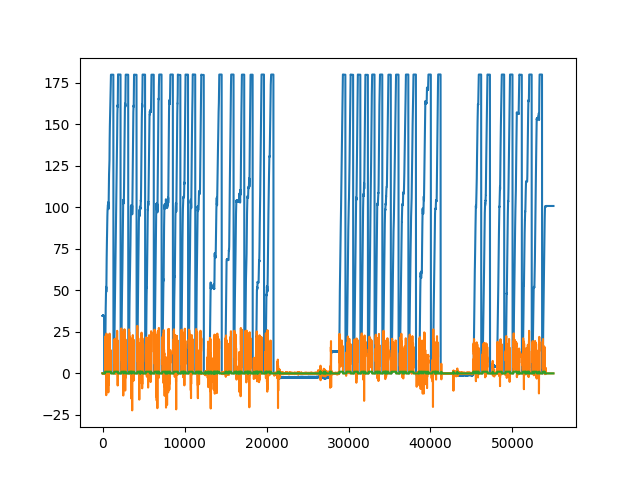

In [190]:
fig = plt.figure()
plt.plot(behaviour['position'])
plt.plot(behaviour['velocity'])
plt.plot(behaviour['movement'])

/home/loulou/Documents/GitHub/suite2p/suite2p/blat/space.py:26: RuntimeWarning: invalid value encountered in divide
  rasters = rasters / occ
/tmp/ipykernel_489842/679244622.py:9: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
/tmp/ipykernel_489842/679244622.py:14: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
/tmp/ipykernel_489842/679244622.py:17: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)


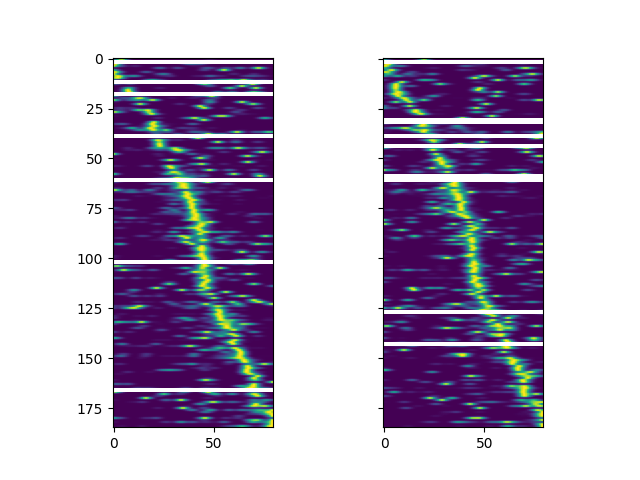

In [226]:
from suite2p.blat import space

iscell = np.load('/'.join((root, 'suite2p/plane0/iscell.npy')), allow_pickle=True)
iscell = iscell[:, 0].astype(bool)

hmap = space.hmaps(behaviour, spks[iscell, :])
stack = hmap['smooth']['stack'].T
rasters = hmap['smooth']['rasters']
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
order = np.argsort(np.argmax(stack, axis=0))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
stack = np.mean(rasters[:, :, ::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[0].imshow(stack[:, order].T)
stack = np.mean(rasters[:, :, 1::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[1].imshow(stack[:, order].T)

# fig = plt.figure()
# plt.imshow(rasters[9, :, :].T)
# plt.plot(behaviour['position'][behaviour['movement']])

(array([ 2.,  3.,  2.,  8., 11., 14., 13., 11.,  8., 10., 13., 18., 11.,
         9., 14.,  4.,  8.,  8.,  2.,  3.,  2.,  3.,  1.,  0.,  3.,  1.,
         1.,  1.,  0.,  1.]),
 array([0.        , 0.03339   , 0.06677999, 0.10016999, 0.13355998,
        0.16694998, 0.20033997, 0.23372997, 0.26711996, 0.30050996,
        0.33389995, 0.36728995, 0.40067994, 0.43406994, 0.46745993,
        0.50084993, 0.53423992, 0.56762992, 0.60101991, 0.63440991,
        0.6677999 , 0.7011899 , 0.73457989, 0.76796989, 0.80135988,
        0.83474988, 0.86813987, 0.90152987, 0.93491986, 0.96830986,
        1.00169985]),
 <BarContainer object of 30 artists>)

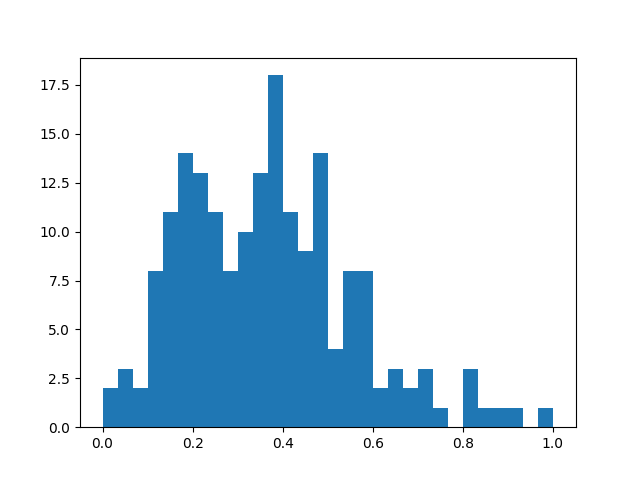

In [227]:
fig = plt.figure()
plt.hist(hmap['SI'], 30)

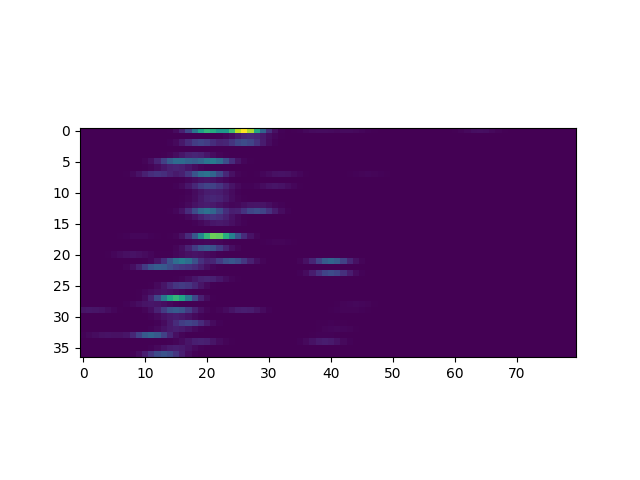

In [230]:
idx = np.argmax(hmap['SI'])
fig = plt.figure()
plt.imshow(hmap['smooth']['rasters'][idx, :, :].T)

(array([4., 4., 3., 2., 9., 8., 2., 5., 2., 3., 9., 4., 5., 5., 0., 1., 3.,
        8., 1., 4., 3., 5., 3., 1., 4., 4., 5., 1., 2., 2., 4., 1., 3., 0.,
        2., 2., 2., 1., 2., 1., 0., 0., 1., 1., 1., 2., 1., 1., 1., 3., 3.,
        0., 1., 3., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 3., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([  0.26154271,   2.36126208,   4.46098137,   6.56070089,
          8.66042042,  10.76013947,  12.85985851,  14.95957756,
         17.05929756,  19.15901566,  21.25873566,  23.35845566,
         25.45817375,  27.55789375,  29.65761375,  31.75733185,
         33.85705185,  35.95677185,  38.05649185,  40.15620804,
         42.25592804,  44.35564804,  46.45536804,  48.55508804,
         50.65480804,  52.75452423,  54.85424423,  56.95396423,
         59.05368423,  61.15340424,  63.25312042,  65.35284424,
         67.45256042,  69.55227661,  7

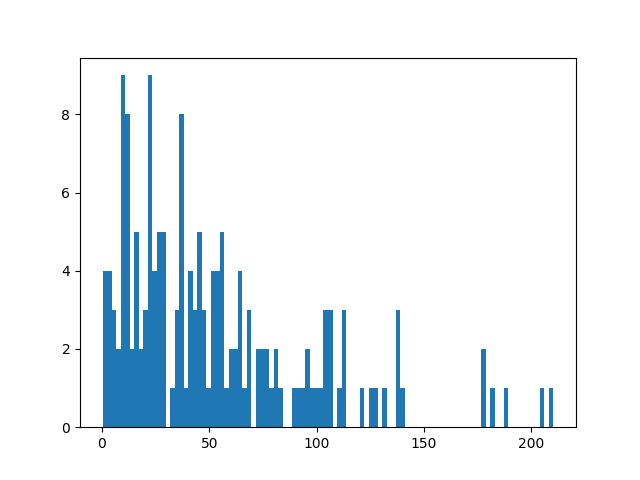

In [236]:
test = spks[5, :]

fig = plt.figure()
plt.hist(test[test > 0], 100)